In [9]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore");

RAND = 10

# Импорт данных

**Описания полей**

- client_id - идентификатор клиента
- education - уровень образования
- sex - пол заемщика
- age - возраст заемщика
- car - флаг наличия автомобиля
- car_type - флаг автомобиля иномарки
- decline_app_cnt - количество отказанных прошлых заявок
- good_work - флаг наличия “хорошей” работы
- bki_request_cnt - количество запросов в БКИ
- home_address - категоризатор домашнего адреса
- work_address - категоризатор рабочего адреса
- income - доход заемщика
- foreign_passport - наличие загранпаспорта
- sna - связь заемщика с клиентами банка
- first_time - давность наличия информации о заемщике
- score_bki - скоринговый балл по данным из БКИ
- region_rating - рейтинг региона
- app_date - дата подачи заявки
- default - флаг дефолта по кредиту

In [10]:
df = pd.read_csv('train.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Размер датасета

In [14]:
df.shape

(891, 12)

Выведем общую информацию о датафрейме при помощи метода info()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Посмотрим на пропуски

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Присутствуют такие типы данных как float64, object, int64. Дополнительно мы можем увидеть пропущенные значения, если они есть, но здесь их нет, так как колонка с количеством пустых значений пуста (non-null).

Как можно заполнять пропуски:
   
- нулями (для числовых данных, но нужно быть аккуратным, например, с возрастом)
- медианами (для числовых данных, но нужно быть аккуратным, например, с возрастом)
- средними (для числовых данных, но нужно быть аккуратным, например, с возрастом)
- модой (для числовых и категориальных данных)
- закодировать невероятным значением, например 'None' / 'Не определено' (для категориальных данных, применимо к алгоритмам на основании деревьев)
- закодировать невероятным значением, например -999 (для числовых данных, применимо к алгоритмам на основании деревьев)
- для упорядоченных данных (например, временных рядов) можно брать соседнее значение – следующее или предыдущее

Посмотрим, какую долю занимают пропуски

In [24]:
print(
    f'Доля пропусков: {round(df.isna().sum() / df.shape[0]*100, 2)}%'
)

Доля пропусков: PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64%


- Видим, что количество пропусков не велико и это признак education. 
- Как правило он не настолько сильно влияет на то, вернет человек кредит или нет, как вариант, строки с пропусками можно и удалить, но вдруг, у человека также в будущем при заполнении данных не будет значения в поле education, поэтому давайте это учтем

Посмотрим на уникальные значения и их кол-во в столбце, где есть пропуски

In [25]:
# ascending - сортировка по возрастанию
df.value_counts(ascending=True)

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
573          1         1       Flynn, Mr. John Irwin ("Irving")                      male    36.0  0      0      PC 17474  26.3875   E25    S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

Заполним пропуски строкой, что образование не определено, это будет как новое значение

In [26]:
df.education = df.fillna("None")

Если мы хотим посмотреть основные описательные статистики, то применяем метод describe()

In [27]:
# df.iloc[:,1:] потому что не включаем client_id!!!!!
df.iloc[:, 1:].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Не видим каких-то явных выбросов и недочетов в данных 

Чтобы проанализировать булевы переменные и переменные типа object, нужно задать дополнительные параметры.

Для объектных данных (например, строк или меток времени) индекс результата будет включать count, unique, top и freq. 
- top - это наиболее распространенное значение
- freq - это частота наиболее распространенного значения

Метки времени также включают в себя first и last элементы

In [28]:
df.describe(include=["object", "bool"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [29]:
62733/73799

0.8500521687285736

- Аналогично как и с числовыми признаками, каких-то отклонений, либо признаков, с одинаковыми значениями нет

Если признаков очень много, то можно свести в агрегированную таблицу

In [31]:
dtype_df = df.dtypes.reset_index()

dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,5
1,float64,2
2,object,5


Изучив бизнес процесс, мы можем выдвинуть предварительно некоторые гипотезы, чтобы в дальнейшем это нам помогло в обработке как и самих данных, так и при генерации новых признаков (фичей), построении модели

# Exploratory data analysis

**Гипотезы:**

- 1. Возраст "хороших" заемщиков больше, по сравнению с "плохими" (распределения возраста в зависимости от флага дефолта смещено в большую сторону при default=0), возрастные более платежеспособные
- 2. Уровень образования зависит от возраста, что влияет и на возврат кредита, также люди с высшим образованием чаще являются "хорошими" заемщиками
- 3. При good_work = 0 увеличивается риск невозврата кредита (флаг дефолта)
- 4. Доход "хороших" заемщиков больше, по сравнению с "плохими" (распределения дохода в зависимости от флага дефолта смещено в большую сторону при default=0)
- 5. score_bki напрямую взаимосвязан с default, чем он меньше, тем выше вероятность клиента выплатить кредит банку **(в данном датасете именно меньше, на реальных данных эти значения положительны)**
- 6. Наличие авто влияет на вероятность возврата кредита
- 7. Рейтинг региона влияет на размер зарплаты, что также может повлиять на возврат кредита

<div class="alert alert-block alert-success">
    
- **Всегда** стоит ориентироваться при выдвижении гипотезы на **целевую переменную**, либо как то связать с целевой переменной. 
    
- То есть наши **гипотезы ВСЕГДА должны отвечать бизнесу** на их вопрос, например, почему нам люди не несут деньги в банк</div> 

## Target

Начинать такой анализ стоит всегда с **анализа целевой переменной**, если у вас классификация, то соотношение классов, если регрессия, то распредление целевой переменной

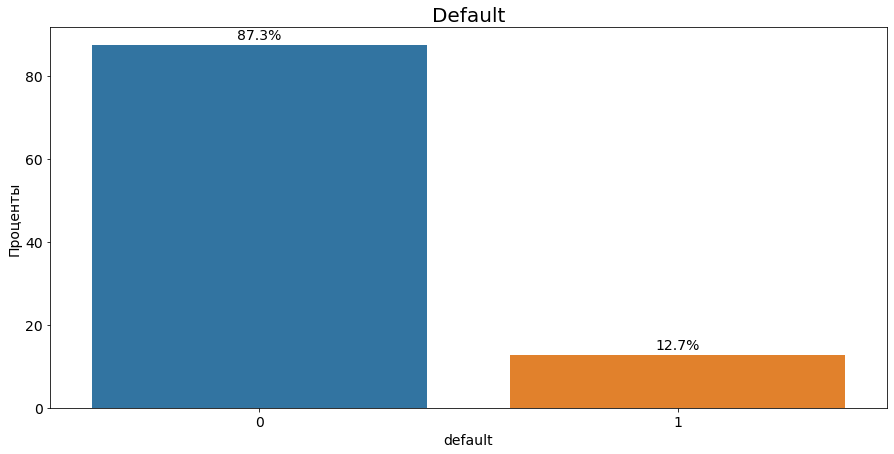

In [17]:
# нормирование на размер датасета
norm_target = (df.default.value_counts(
    normalize=True).mul(100).rename('percent').reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(
        percentage,  # текст
        # координата xy
        (p.get_x() + p.get_width() / 2., p.get_height()),
        # центрирование
        ha='center',
        va='center',
        xytext=(0, 10),
        # точка смещения относительно координаты
        textcoords='offset points',
        fontsize=14)

plt.title('Default', fontsize=20)
plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Как оформить в виде функции, чтобы не писать по несколько раз  один и тот же код

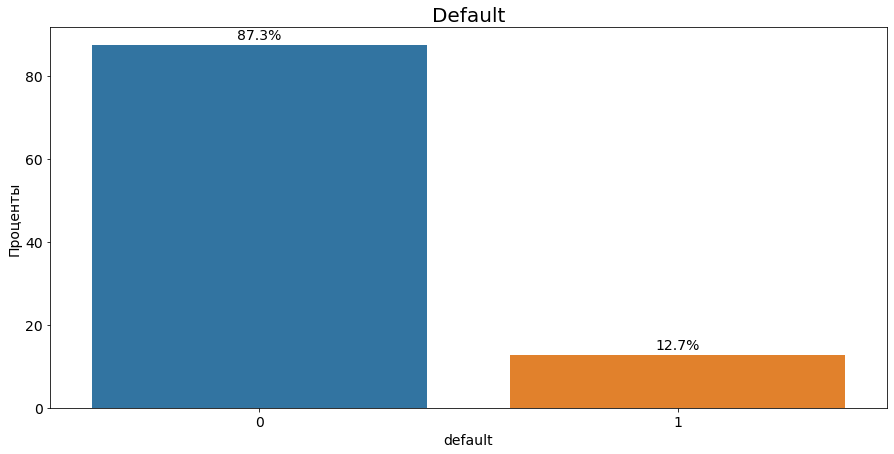

In [18]:
def plot_text(ax: plt.Axes):
    """
    Вывод текста на графике barplot
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            # координата xy
            (p.get_x() + p.get_width() / 2., p.get_height()),
            # центрирование
            ha='center',
            va='center',
            xytext=(0, 10),
            # точка смещения относительно координаты
            textcoords='offset points',
            fontsize=14)
        
        
# нормирование на размер датасета
norm_target = (df
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

plot_text(ax)

plt.title('Default', fontsize=20)
plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [19]:
norm_target

,index,percent
0,0,87.300641
1,1,12.699359


- В датесете присутствует дисбаланс классов, **при обучении модели это стоит учитывать**

## 1. гипотеза

Возраст "хороших" заемщиков больше, по сравнению с "плохими" (распределения возраста в зависимости от флага дефолта смещено в большую сторону при default=0), возрастные более платежеспособные

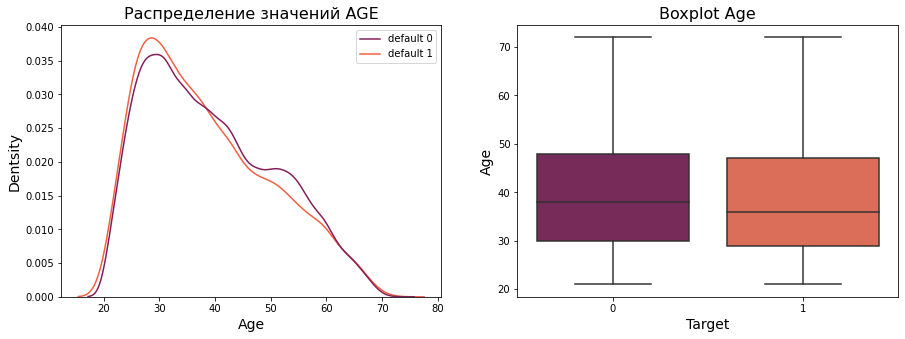

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(
    data={
        "default 0": df[df.default == 0].age,
        "default 1": df[df.default == 1].age
    },
    # common_norm=False - независимая нормализация каждого подмножества
    # нормируем, так как разное кол-во людей в каждой группе default
    common_norm=False,
    palette='rocket',
    ax=axes[0])

axes[0].set_title('Распределение значений AGE', fontsize=16)
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Dentsity', fontsize=14)

sns.boxplot(x='default', y='age', data=df, palette='rocket', ax=axes[1])

axes[1].set_title('Boxplot Age', fontsize=16)
axes[1].set_ylabel('Age', fontsize=14)
axes[1].set_xlabel('Target', fontsize=14)
plt.show()

In [21]:
df.groupby('default')['age'].median()

default
0    38.0
1    36.0
Name: age, dtype: float64

- Выборки по возрасту не сильно различаются, также чуть выделяются более возрастные "хорошие" клиенты, которые вернули кредит, гипотеза отчасти подтвердилась

## 2. гипотеза

Уровень образования зависит от возраста, что влияет и на возврат кредита, также люди с высшим образованием чаще являются "хорошими" заемщиками

- SCH - школьное образование
- UGR - бакалавриат
- GRD - магистратура / аспирантура
- PGR - аспирант
- ACD - академик

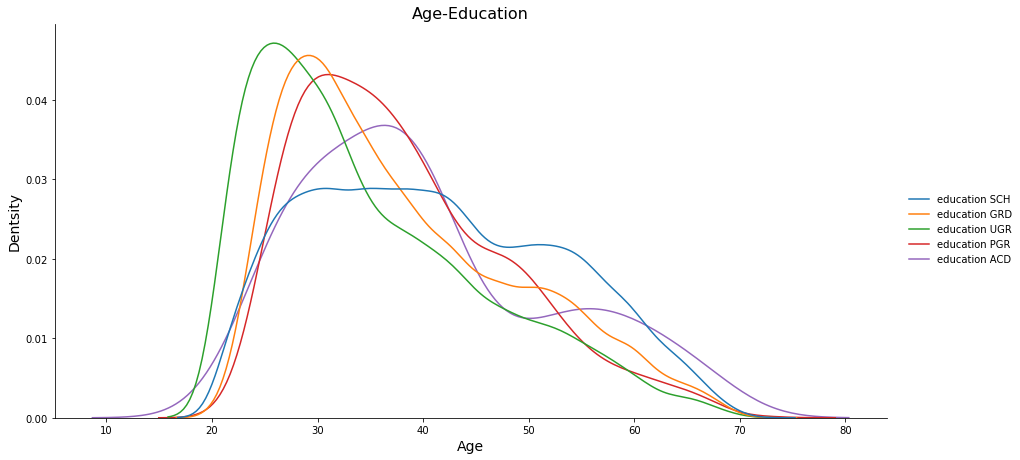

In [22]:
sns.displot(
    {
        "education SCH": df[df.education == 'SCH'].age,
        "education GRD": df[df.education == 'GRD'].age,
        "education UGR": df[df.education == 'UGR'].age,
        "education PGR": df[df.education == 'PGR'].age,
        "education ACD": df[df.education == 'ACD'].age,
    },
    kind="kde",
    common_norm=False,
    height=6,
    aspect=2.1)

plt.title('Age-Education', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14);
plt.show()

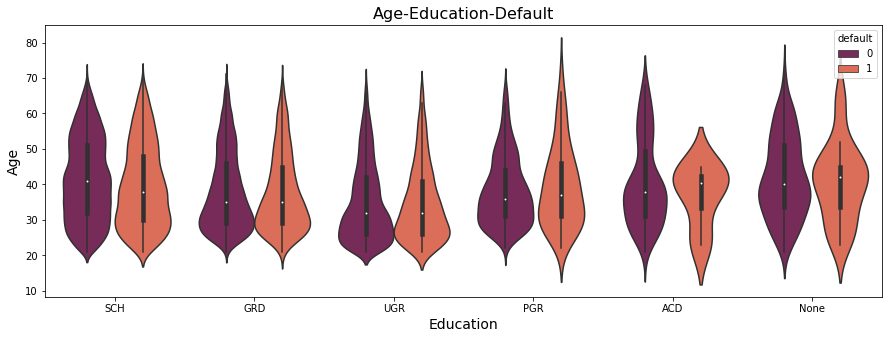

In [26]:
plt.figure(figsize=(15, 5))

sns.violinplot(x='education', y='age', hue='default', data=df, palette='rocket')

plt.title('Age-Education-Default', fontsize=16)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)
plt.show()

In [41]:
def barplot_group(df_data: pd.DataFrame, col_main: str, col_group: str,
                  title: str) -> None:
    """
    Построение barplot с нормированными данными с выводом значений на графике
    """

    plt.figure(figsize=(15, 6))

    data = (df_data.groupby(
        [col_group])[col_main].value_counts(normalize=True).rename(
            'percentage').mul(100).reset_index().sort_values(col_group))

    ax = sns.barplot(x=col_main,
                     y="percentage",
                     hue=col_group,
                     data=data,
                     palette='rocket')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
            ha='center',  # центрирование
            va='center',
            xytext=(0, 7),
            textcoords='offset points',  # точка смещения относительно координаты
            fontsize=12)

    plt.title(title, fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)
    plt.show()

In [42]:
df[:5]

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,2014-02-01,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,2014-03-12,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,2014-02-01,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,2014-01-23,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,2014-04-18,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [38]:
# нормирование
#1 группа = 110 чел
#10 муж
#100 жен

#10/110 = 0.09 муж
#100/110 = 0.91 жен

SyntaxError: invalid syntax (<ipython-input-38-c52bfad62beb>, line 2)

In [43]:
(df.groupby(['default'])['education']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values("default"))

,default,education,percentage
0,0,SCH,51.233179
1,0,GRD,32.998588
2,0,UGR,13.232030
3,0,PGR,1.825322
4,0,None,0.422183
5,0,ACD,0.288699
6,1,SCH,62.441315
7,1,GRD,22.460521
8,1,UGR,13.775075
9,1,PGR,0.864277


Посмотрим на кол-во человек с тем или иным образованием в разрезе default.

**Мы подсчитываем кол-во человек с тем или иным образованием в разрезе дефолта по кредиту default и нормируем на общее кол-во человек с тем или иным флагом дефолта по кредиту default. ЗАПОМНИТЬ!! ПРИГОДИТСЯ В ДРУГИХ ДЗ**

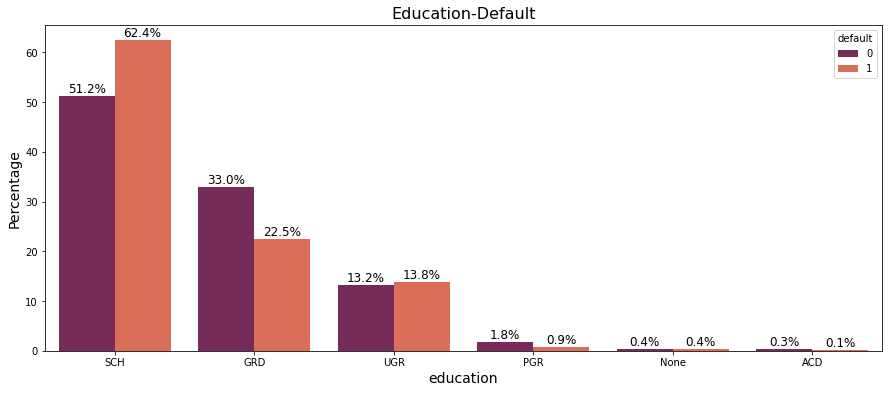

In [44]:
barplot_group(df, "education", "default", 'Education-Default')

In [45]:
def check_chi2(x: pd.Series, y: pd.Series, alpha: float = 0.05):
    """
    Проверка связи двух категориальных переменных
    """
    # create crosstab for chi2
    ct_table_ind = pd.crosstab(x, y)
    chi2_stat, p, dof, expected = stats.chi2_contingency(ct_table_ind)
    print(f"chi2 statistic: {chi2_stat:.5g}")
    print(f"p-value {p:.5g}")

    if p < alpha:
        print("Two categorical variables have a significant connection")
    else:
        print("Two categorical variables don't have a significant connection")


check_chi2(df['education'], df['default'])

chi2 statistic: 541.69
p-value 7.96e-115
Two categorical variables have a significant connection


- Видим, что процент недобросовестных заемщиков выше с уровнем образования SCH, но их средний возраст ниже, хороших заемщиков с аналогичным образованием
- Среди людей с образованием GRD больше всего хороших заемщиков, возраст у них роли не сыграл
- Для UGR разница не значительная
- Скорее в данном случае влияет не как сам возраст, а уровень образования
- Также можно отменить, что в какой-то степени GRD - более стабильны в плане выплат.

## 3. Гипотеза

При good_work = 0 (Отстутсвие хорошей работы) увеличивается риск невозврата кредита (флаг дефолта)

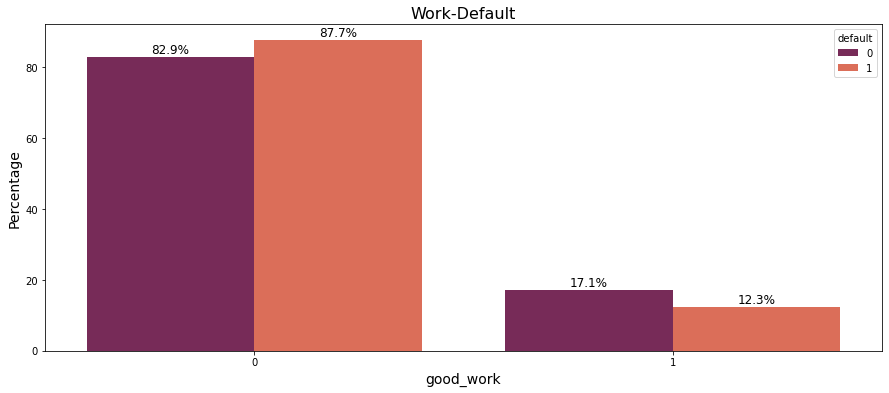

In [46]:
barplot_group(df, "good_work", "default", 'Work-Default')

In [47]:
check_chi2(df['good_work'], df['default'])

chi2 statistic: 138.4
p-value 5.9492e-32
Two categorical variables have a significant connection


- Наличие хорошей работы оказывает влияние на возврат кредита, гипотеза подтвердилась

## 4. Гипотеза

Доход "хороших" заемщиков больше, по сравнению с "плохими", а именно распределения дохода в зависимости от флага дефолта смещено в большую сторону при default=0)

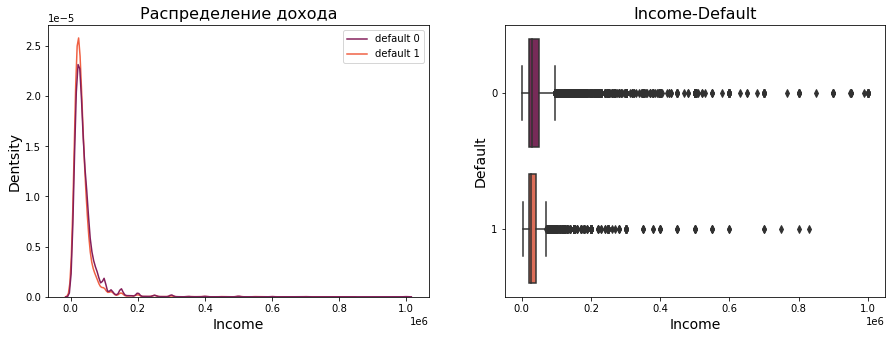

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(
    data={
        "default 0": df[df.default == 0].income,
        "default 1": df[df.default == 1].income
    },
    # common_norm=False - независимая нормализация каждого подмножества
    # нормируем, так как разное кол-во людей в каждой группе default
    common_norm=False,
    palette='rocket',
    ax=axes[0])

axes[0].set_title('Распределение дохода', fontsize=16)
axes[0].set_xlabel('Income', fontsize=14)
axes[0].set_ylabel('Dentsity', fontsize=14)

sns.boxplot(y='default', x='income', data=df, palette='rocket', ax=axes[1], orient='h')

plt.title('Income-Default', fontsize=16)
plt.ylabel('Default', fontsize=14)
plt.xlabel('Income', fontsize=14)
plt.show()

axes[1].set_title('Boxplot Income', fontsize=16)
axes[1].set_ylabel('Income', fontsize=14)
axes[1].set_xlabel('Target', fontsize=14)
plt.show()

In [51]:
df.groupby('default')['income'].median()

default
0    30000.0
1    28000.0
Name: income, dtype: float64

In [53]:
df[df.default == 0].income.shape

(64427,)

In [52]:
print(
    stats.ttest_ind(df[df.default == 0].income,
                    df[df.default == 1].income,
                    equal_var=False))

Ttest_indResult(statistic=12.168240454573628, pvalue=6.920607578107367e-34)


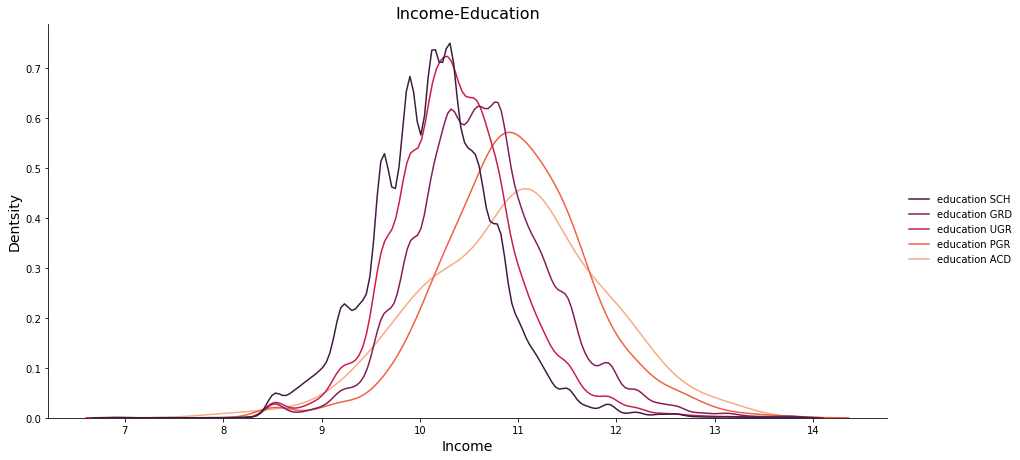

In [54]:
df_income = df.copy()
df_income.income = np.log(df.income + 1)

sns.displot(
    {
        "education SCH": df_income[df_income.education == 'SCH'].income,
        "education GRD": df_income[df_income.education == 'GRD'].income,
        "education UGR": df_income[df_income.education == 'UGR'].income,
        "education PGR": df_income[df_income.education == 'PGR'].income,
        "education ACD": df_income[df_income.education == 'ACD'].income,
    },
    kind="kde",
    common_norm=False,
    palette='rocket',
    height=6,
    aspect=2.1)

plt.title('Income-Education', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)
plt.show()

- Можем сказать, что есть разница в доходах между хорошими и плохими есть. Гипотеза подтвердилась
- Также можно отметить, что при разном уровне образования, разные показатели средних в зарплате

## 5. Гипотеза

score_bki напрямую взаимосвязан с default, чем он меньше (в данном датасете), тем выше вероятность клиента выплатить кредит банку

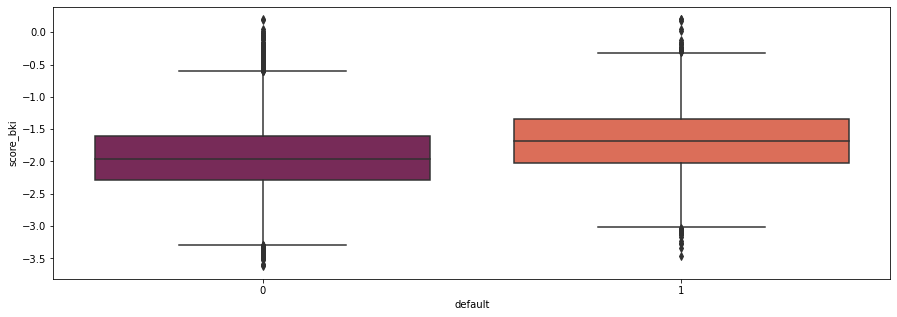

In [55]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='default', y='score_bki', data=df, palette='rocket')
plt.show()

In [56]:
print(
    stats.ttest_ind(df[df.default == 0].score_bki,
                    df[df.default == 1].score_bki,
                    equal_var=False))

Ttest_indResult(statistic=-48.04022091169685, pvalue=0.0)


- Есть различия, гипотеза подтвердилась, средние различны, и score_bki влияет на возвращение кредита

## 6. Гипотеза

Наличие автомобиля влияет на вероятность возврата кредита

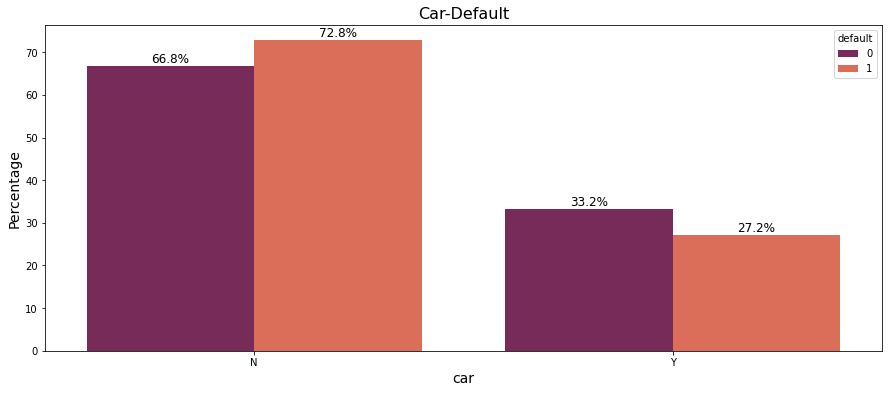

In [57]:
barplot_group(df, "car", "default", 'Car-Default')

In [58]:
check_chi2(df['car'], df['default'])

chi2 statistic: 137.2
p-value 1.0885e-31
Two categorical variables have a significant connection


- Наличие авто влияет на возврат кредита. Гипотеза подтвердилась

## 7. Гипотеза

Рейтинг региона влияет на размер зарплаты, что также может повлиять на возврат кредита

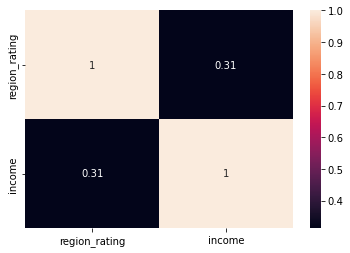

In [60]:
sns.heatmap(df[['region_rating', 'income']].corr(method='spearman'),
            annot=True)
plt.show()

In [62]:
df[['region_rating', 'income']].corr(method='spearman')

,region_rating,income
region_rating,1.000000,0.314035
income,0.314035,1.000000


In [61]:
df.region_rating.value_counts()

50    27523
60    16075
40    12027
80    11469
70     6199
30      300
20      206
Name: region_rating, dtype: int64

- Нет линейных зависимостей между рейтингом региона и зарплатой

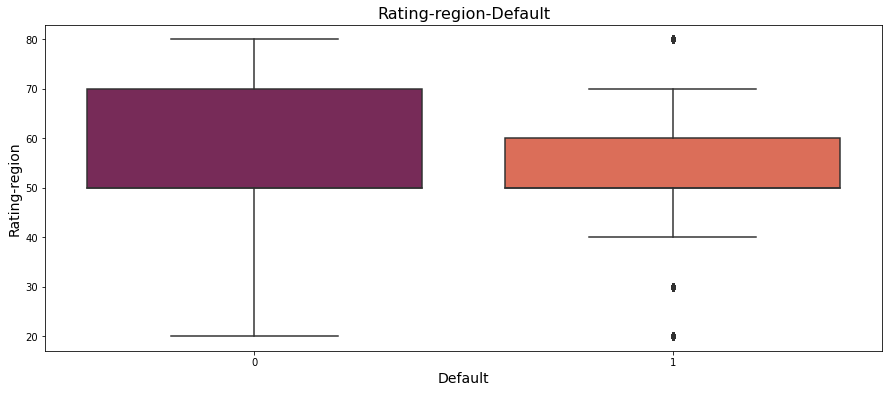

In [63]:
plt.figure(figsize=(15, 6))

sns.boxplot(x='default', y='region_rating', data=df, palette='rocket')

plt.title('Rating-region-Default', fontsize=16)
plt.ylabel('Rating-region', fontsize=14)
plt.xlabel('Default', fontsize=14)
plt.show()

- Видим, что разброс значений и значения между Q1 и Q3 для default=0 больше, их медианы находятся на одном уровне

In [64]:
df.groupby('default')['region_rating'].median()

default
0    50.0
1    50.0
Name: region_rating, dtype: float64

In [65]:
df.groupby('default')['region_rating'].mean()

default
0    57.169044
1    53.677977
Name: region_rating, dtype: float64

Возможно, регионы стоит рассматривать как **категориальную переменную** (это нужно уточнить у бизнеса)

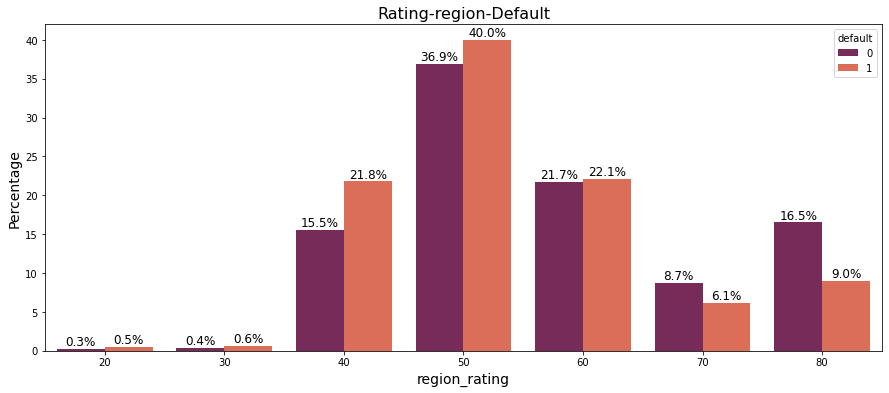

In [66]:
barplot_group(df, 'region_rating', 'default', 'Rating-region-Default')

In [67]:
check_chi2(df['region_rating'], df['default'])

chi2 statistic: 610.46
p-value 1.2934e-128
Two categorical variables have a significant connection


Тогда рассмотрим еще индекс региона в разрезе зарплат

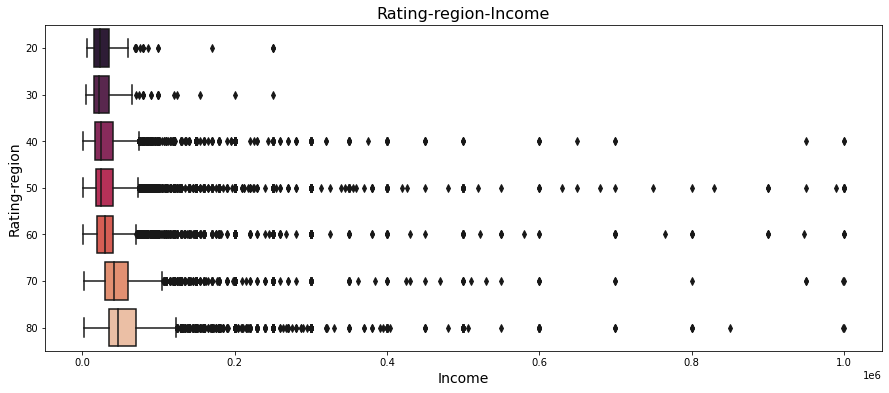

In [68]:
plt.figure(figsize=(15, 6))

sns.boxplot(x='income', y='region_rating', data=df, palette='rocket', orient='h')

plt.title('Rating-region-Income', fontsize=16)
plt.ylabel('Rating-region', fontsize=14)
plt.xlabel('Income', fontsize=14)
plt.show()

In [69]:
df.groupby('region_rating')['income'].median()

region_rating
20    23000.0
30    21500.0
40    25000.0
50    25000.0
60    30000.0
70    42000.0
80    47000.0
Name: income, dtype: float64

- Видим, что рейтингов не так много и они представлены целыми числами. Также можно отметить, что в регионах с рейтингом от 70 больше "хороших" заемщиков
- Гипотеза подтвердилась, что рейтинг региона взаимосвязан с доходом
- Так как ранее мы поняли, что income взаимосвязан с default, в процессе выяснили, что income и region_rating взаимосвязаны, то это нам еще раз подтверждает отчасти то, что взаимосвязь между region_rating и default также есть

## Анализ распределений и линейных зависимотей

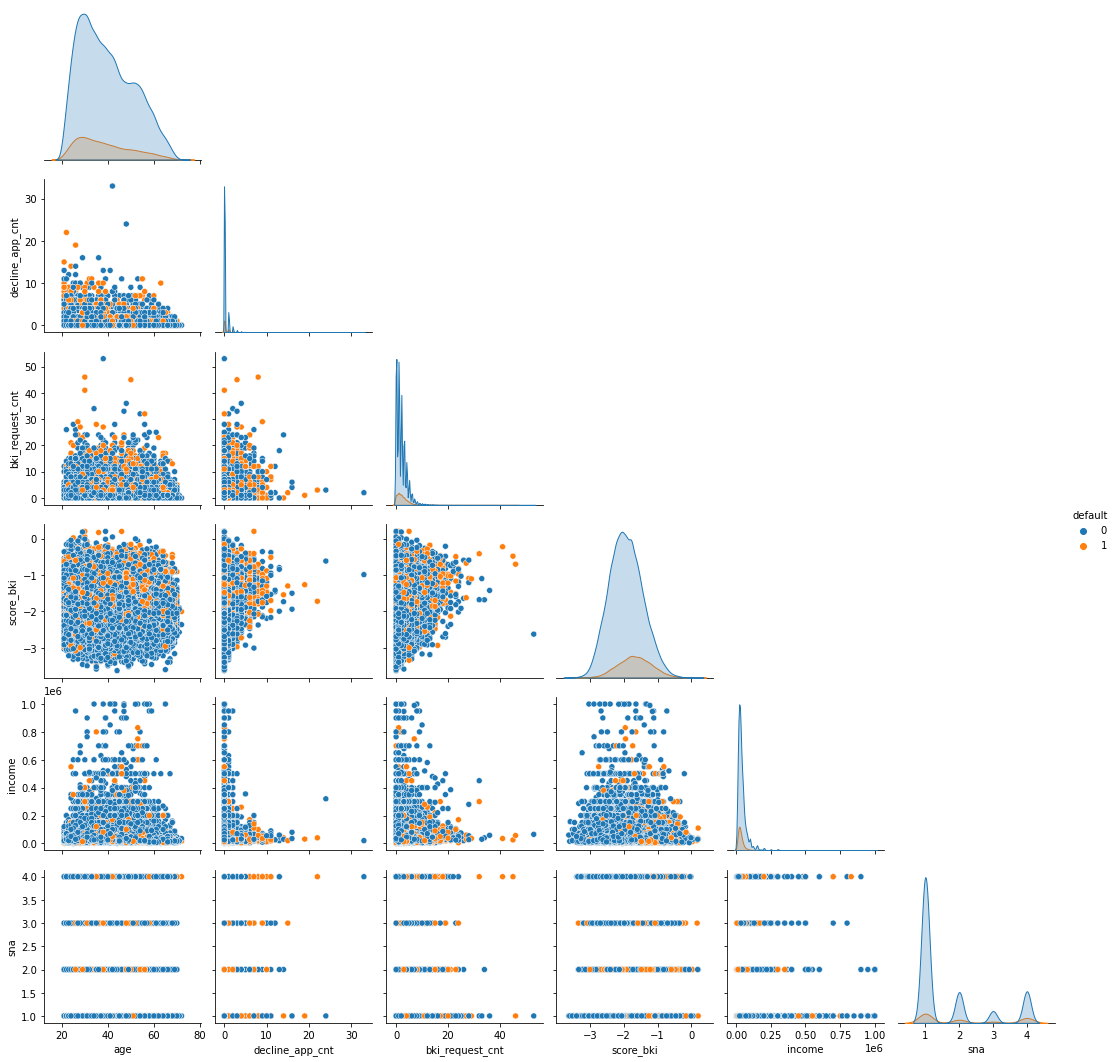

In [71]:
features = [
    'age', 'decline_app_cnt', 'bki_request_cnt', 'score_bki', 'income', 'sna'
]

sns.pairplot(df, vars=features, hue='default', corner=True)
plt.show()

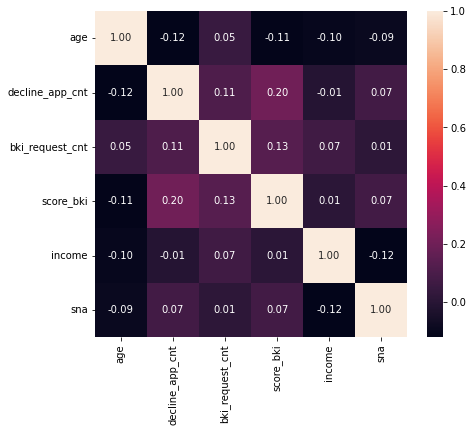

In [72]:
plt.figure(figsize=(7, 6))
sns.heatmap(df[features].corr(method='spearman'), annot=True, fmt='.2f');

Можем посмотреть на все признаки, но часть из них будут категориальными, тогда нет смысла проверять при помощи анализа дисперсий

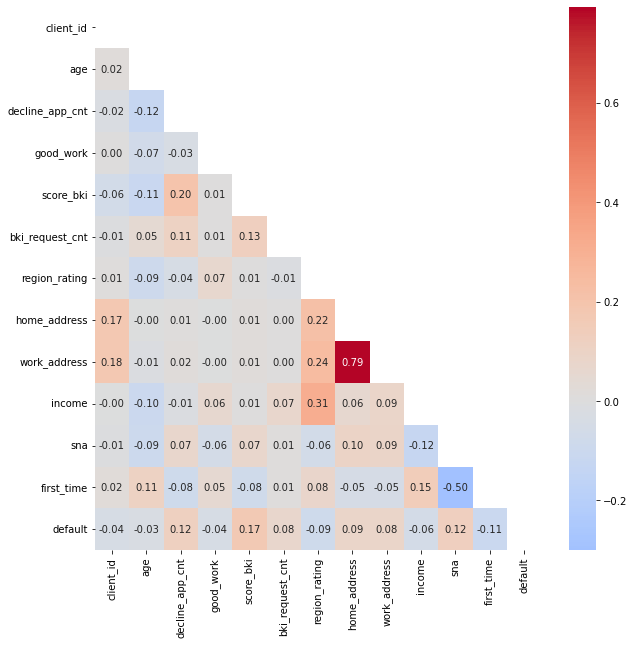

In [73]:
"""
fmt - кол-во знаков после запятой
vmin - масштаб шкалы min значение
vmax - масштаб шкалы max значение
center - центр
cmap - цветовая схема
np.tril() - маска значений выше главной диагонали
np.triu() - маска значений ниже главной диагонали
"""
matrix = np.triu(df.corr(method='spearman'))

plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(method='spearman'), annot=True,
            fmt='.2f', vmin=-0.3, center=0, cmap='coolwarm', mask=matrix);

# Feature engineering

## Получение новых признаков

Создание бинов

In [74]:
df.age.describe()

count    73799.000000
mean        39.280641
std         11.520378
min         21.000000
25%         30.000000
50%         37.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64

In [75]:
pd.cut(df.age, bins=5)

0          (61.8, 72.0]
1          (51.6, 61.8]
2        (20.949, 31.2]
3          (51.6, 61.8]
4          (41.4, 51.6]
              ...      
73794      (41.4, 51.6]
73795      (31.2, 41.4]
73796    (20.949, 31.2]
73797    (20.949, 31.2]
73798      (31.2, 41.4]
Name: age, Length: 73799, dtype: category
Categories (5, interval[float64, right]): [(20.949, 31.2] < (31.2, 41.4] < (41.4, 51.6] < (51.6, 61.8] < (61.8, 72.0]]

In [76]:
# как можно сделать бины
pd.cut(df.age, bins=3, labels=["young", "middle-aged", "older"]).value_counts()

young          39161
middle-aged    26402
older           8236
Name: age, dtype: int64

Лучше разбивать руками по возможности

In [77]:
def get_bins_age(data: int) -> str:
    """
    Генерация бинов для признака "возраст"
    """
    if isinstance(data, (int, float)):
        if data <= 35:
            return 'young'
        elif 35 < data <= 55:
            return 'middle-aged'
        elif data > 55:
            return 'older'
    return None

In [78]:
df['age_bins'] = df.age.transform(lambda x: get_bins_age(x))

In [79]:
df['age_bins'].value_counts()

young          32796
middle-aged    32767
older           8236
Name: age_bins, dtype: int64

In [80]:
df.isna().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
age_bins            0
dtype: int64

In [81]:
df.income.describe()

count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

In [82]:
pd.cut(df.income, bins=3)

0        (1.0, 334000.0]
1        (1.0, 334000.0]
2        (1.0, 334000.0]
3        (1.0, 334000.0]
4        (1.0, 334000.0]
              ...       
73794    (1.0, 334000.0]
73795    (1.0, 334000.0]
73796    (1.0, 334000.0]
73797    (1.0, 334000.0]
73798    (1.0, 334000.0]
Name: income, Length: 73799, dtype: category
Categories (3, interval[float64, right]): [(1.0, 334000.0] < (334000.0, 667000.0] < (667000.0, 1000000.0]]

In [83]:
def get_bins_income(data: float) -> str:
    """
    Генерация бинов для признака "доход/зарплата"
    """
    if isinstance(data, (int, float)):
        if data <= 20000:
            return 'low'
        elif 20000 < data <= 150000:
            return 'middle'
        elif data > 150000:
            return 'high'
    return None

In [84]:
df['income_bins'] = df.income.transform(lambda x: get_bins_income(x))

In [85]:
df['income_bins'].value_counts()

middle    51008
low       21430
high       1361
Name: income_bins, dtype: int64

In [86]:
df[:5]

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,age_bins,income_bins
0,25905,2014-02-01,SCH,M,62,Y,Y,0,0,-2.008753,...,50,1,2,18000,4,1,N,0,older,low
1,63161,2014-03-12,SCH,F,59,N,N,0,0,-1.532276,...,50,2,3,19000,4,1,N,0,older,low
2,25887,2014-02-01,SCH,M,25,Y,N,2,0,-1.408142,...,80,1,2,30000,1,4,Y,0,young,middle
3,16222,2014-01-23,SCH,F,53,N,N,0,0,-2.057471,...,50,2,3,10000,1,3,N,0,middle-aged,low
4,101655,2014-04-18,GRD,M,48,N,N,0,1,-1.244723,...,60,2,3,30000,1,4,Y,0,middle-aged,middle


<div class="alert alert-block alert-danger">

- Создадим новый признак - месяц
- Не рекомендуется создавать признак год, так как у нас не временные ряды, и в новых данных может появиться новое значение года, о которой модель знать не будет!!!

</div> 

In [87]:
df['app_date'].dt.month_name()

0        February
1           March
2        February
3         January
4           April
           ...   
73794       March
73795       March
73796       April
73797     January
73798     January
Name: app_date, Length: 73799, dtype: object

In [88]:
df['month_name'] = df['app_date'].dt.month_name()
df['day_of_week_name'] = df['app_date'].dt.day_name()

df.drop(['app_date'], axis=1, inplace=True)

In [89]:
df[:3]

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address,income,sna,first_time,foreign_passport,default,age_bins,income_bins,month_name,day_of_week_name
0,25905,SCH,M,62,Y,Y,0,0,-2.008753,1,...,2,18000,4,1,N,0,older,low,February,Saturday
1,63161,SCH,F,59,N,N,0,0,-1.532276,3,...,3,19000,4,1,N,0,older,low,March,Wednesday
2,25887,SCH,M,25,Y,N,2,0,-1.408142,1,...,2,30000,1,4,Y,0,young,middle,February,Saturday


In [90]:
# Средний доход с учетом рейтинга региона
mean_inc_reg = df.groupby('region_rating')['income'].median().to_dict()
df['mean_income_region'] = df['region_rating'].map(mean_inc_reg)

In [91]:
df[:5]

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,income,sna,first_time,foreign_passport,default,age_bins,income_bins,month_name,day_of_week_name,mean_income_region
0,25905,SCH,M,62,Y,Y,0,0,-2.008753,1,...,18000,4,1,N,0,older,low,February,Saturday,25000.0
1,63161,SCH,F,59,N,N,0,0,-1.532276,3,...,19000,4,1,N,0,older,low,March,Wednesday,25000.0
2,25887,SCH,M,25,Y,N,2,0,-1.408142,1,...,30000,1,4,Y,0,young,middle,February,Saturday,47000.0
3,16222,SCH,F,53,N,N,0,0,-2.057471,2,...,10000,1,3,N,0,middle-aged,low,January,Thursday,25000.0
4,101655,GRD,M,48,N,N,0,1,-1.244723,1,...,30000,1,4,Y,0,middle-aged,middle,April,Friday,30000.0


In [92]:
# Средний доход с учетом возраста
mean_inc_age = df.groupby('age')['income'].median().to_dict()
df['mean_income_age'] = df['age'].map(mean_inc_age)

In [93]:
# Средний доход с учетом пола
mean_inc_age = df.groupby('sex')['income'].median().to_dict()
df['mean_income_sex'] = df['sex'].map(mean_inc_age)

In [94]:
# Средний доход с учетом образования
mean_inc_age = df.groupby('education')['income'].median().to_dict()
df['mean_income_education'] = df['education'].map(mean_inc_age)

In [95]:
# Средний score bki с учетом возраста
mean_bki_age = df.groupby('age')['score_bki'].median().to_dict()
df['mean_bki_age'] = df['age'].map(mean_bki_age)

Посмотрим на распределение числовых признаков

In [96]:
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']

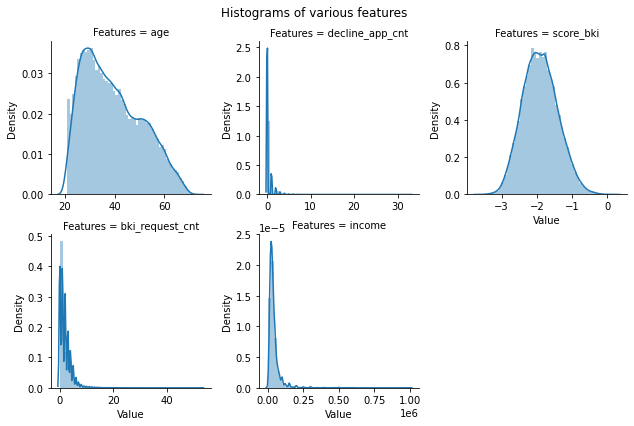

In [97]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

Логарифмировать можем как целевую перменную, так и признаки, если где то отрицательные значения, то стоит добавить константу, например 1 (только положительное число)

In [ ]:
# for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
#     df[i] = np.log(df[i]+1)

## Отбор признаков!!! ДЗ прочитать и запомнить!!!! 

https://habr.com/ru/company/ods/blog/325422/

https://tproger.ru/translations/feature-engineering-in-machine-learning/

https://habr.com/ru/company/jetinfosystems/blog/470622/

https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold

Если признаков более ~500, то необходимо применить методы, для отбора важных признаков. 

Основные методы:
- Удаление сильно скоррелированных признаков (>0.9)
- Прямой отбор (пошаговое добавление признаков и обучение модели)
- Обратный отбор (пошаговое исключение признаков и обучение модели)
- Статистические методы
- Рекурсивное исключение признаков **RFE** (наиболее популярный метод)
- Диаграмма важности признаков (будем проходить далее)
- Регуляризация (будем проходить далее)

In [98]:
cols_num = df.drop([
    'client_id', 'default', 'region_rating', 'work_address', 'home_address',
    'good_work', 'first_time', 'sna'
],
    axis=1).select_dtypes(include=['int64', 'float64']).columns

In [99]:
cols_num

Index(['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income',
       'mean_income_region', 'mean_income_age', 'mean_income_sex',
       'mean_income_education', 'mean_bki_age'],
      dtype='object')

In [100]:
df[cols_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    73799 non-null  int64  
 1   decline_app_cnt        73799 non-null  int64  
 2   score_bki              73799 non-null  float64
 3   bki_request_cnt        73799 non-null  int64  
 4   income                 73799 non-null  int64  
 5   mean_income_region     73799 non-null  float64
 6   mean_income_age        73799 non-null  float64
 7   mean_income_sex        73799 non-null  float64
 8   mean_income_education  73799 non-null  float64
 9   mean_bki_age           73799 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 5.6 MB


### Статистический подход

Статистический подход, когда мы можем сравнить дисперсии, но просто в лоб сравнивать без нормализации данные не верно, поэтому нам нужно нормализовать наши значения, чтобы выровнять у признаков дисперсии и уже потом сравнивать

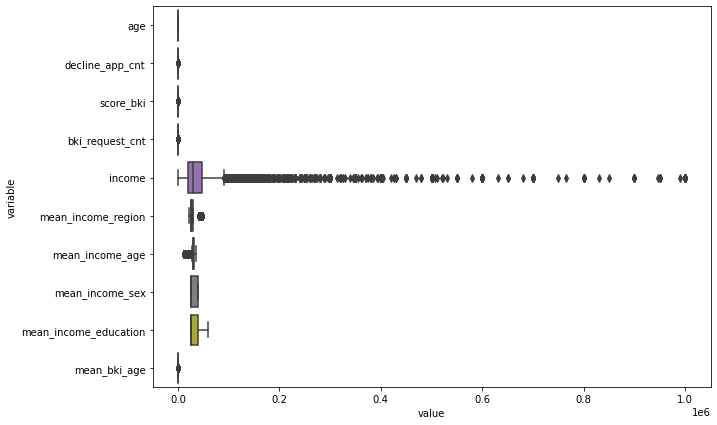

In [101]:
plt.figure(figsize=(10, 7))
sns.boxplot(y="variable", x="value", data=pd.melt(df[cols_num]), orient='h');

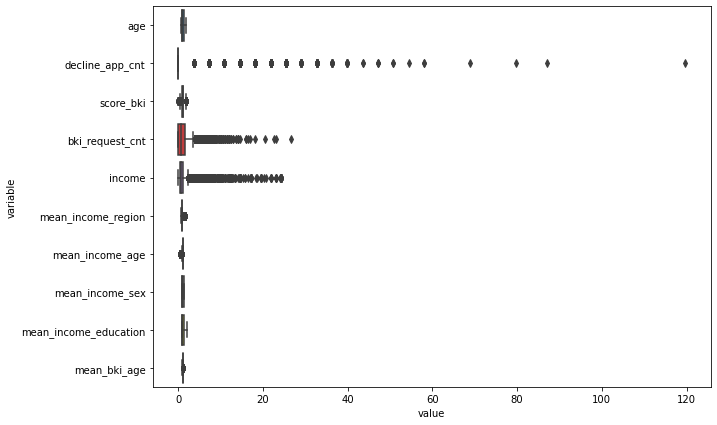

In [102]:
df_select_norm = df[cols_num] / df[cols_num].mean()

plt.figure(figsize=(10, 7))
sns.boxplot(y="variable", x="value", data=pd.melt(df_select_norm), orient='h');

In [103]:
df_select_norm.columns

Index(['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income',
       'mean_income_region', 'mean_income_age', 'mean_income_sex',
       'mean_income_education', 'mean_bki_age'],
      dtype='object')

**VarianceThreshold** удаляет все объекты, дисперсия которых не соответствует некоторому порогу. По умолчанию он удаляет все объекты с нулевой дисперсией, то есть объекты, которые имеют одинаковое значение во всех выборках.

Пример:
- Для квазипостоянных объектов, которые имеют одинаковые значение (дубли), использование порога 0,01 означало бы удаление столбца, в котором 99% значений аналогичны.

In [107]:
df_select_norm[:5]

,age,decline_app_cnt,score_bki,bki_request_cnt,income,mean_income_region,mean_income_age,mean_income_sex,mean_income_education,mean_bki_age
0,1.578386,0.000000,1.054616,0.499915,0.437959,0.808636,0.664323,1.267735,0.803263,1.031155
1,1.502012,0.000000,0.804461,1.499746,0.462290,0.808636,0.730756,0.792335,0.803263,1.038122
2,0.636446,7.252973,0.739290,0.499915,0.729931,1.520236,0.996485,1.267735,0.803263,0.944332
3,1.349265,0.000000,1.080194,0.999831,0.243310,0.808636,0.905141,0.792335,0.803263,1.037623
4,1.221976,0.000000,0.653493,0.499915,0.729931,0.970363,0.996485,1.267735,1.285221,1.034948


In [ ]:
# !pip3 install scikit-learn

In [110]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.05)
_ = vt.fit(df_select_norm)

mask = vt.get_support()

print('new shape=', df[cols_num].loc[:, mask].shape)
print('old shape=', df[cols_num].shape)
print(
    f'remove cols: {set(df[cols_num].loc[:, mask].columns)^set(cols_num)}'
)

df[cols_num].loc[:, mask][:4]

new shape= (73799, 8)
old shape= (73799, 10)
remove cols: {'mean_income_age', 'mean_bki_age'}


,age,decline_app_cnt,score_bki,bki_request_cnt,income,mean_income_region,mean_income_sex,mean_income_education
0,62,0,-2.008753,1,18000,25000.0,40000.0,25000.0
1,59,0,-1.532276,3,19000,25000.0,25000.0,25000.0
2,25,2,-1.408142,1,30000,47000.0,40000.0,25000.0
3,53,0,-2.057471,2,10000,25000.0,25000.0,25000.0


### Рекурсивный отбор признаков (популярный, но долгий)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

забегая немного вперед

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV

Входные параметры:

- estimator - модель ML
- n_features_to_select - int, кол-во признаков, которые нужно отобрать (фиксировано). Если None, то выбирается половина признаков
- step - Если больше или равно 1, то шаг соответствует (целому числу) объектов, которые необходимо удалить на каждой итерации. Если в пределах (0.0, 1.0), то шаг соответствует проценту (округленному в меньшую сторону) объектов, подлежащих удалению на каждой итерации

Выходные параметры:
- ranking_ - Ранжирование объектов, ranking_[i] соответствует позиции в рейтинге i-го объекта. наилучшим признакам присваивается ранг=1
- support_ - Маска выбранных объектов

In [112]:
df.education.value_counts()

SCH     38860
GRD     23365
UGR      9816
PGR      1257
None      307
ACD       194
Name: education, dtype: int64

In [113]:
df.car = df.car.map({"Y": 1, "N": 0})
df.car_type = df.car_type.map({"Y": 1, "N": 0})
df.education = df.education.map({
    "SCH": 0,
    "UGR": 1,
    "GRD": 2,
    "PGR": 3,
    'ACD': 4,
    "None": -999
})
df[:5]

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,default,age_bins,income_bins,month_name,day_of_week_name,mean_income_region,mean_income_age,mean_income_sex,mean_income_education,mean_bki_age
0,25905,0,M,62,1,1,0,0,-2.008753,1,...,0,older,low,February,Saturday,25000.0,20000.0,40000.0,25000.0,-1.981476
1,63161,0,F,59,0,0,0,0,-1.532276,3,...,0,older,low,March,Wednesday,25000.0,22000.0,25000.0,25000.0,-1.994864
2,25887,0,M,25,1,0,2,0,-1.408142,1,...,0,young,middle,February,Saturday,47000.0,30000.0,40000.0,25000.0,-1.814637
3,16222,0,F,53,0,0,0,0,-2.057471,2,...,0,middle-aged,low,January,Thursday,25000.0,27250.0,25000.0,25000.0,-1.993905
4,101655,2,M,48,0,0,0,1,-1.244723,1,...,0,middle-aged,middle,April,Friday,30000.0,30000.0,40000.0,40000.0,-1.988764


In [114]:
X = pd.get_dummies(df.drop(['client_id', 'default'], axis=1), drop_first=True)
y = df['default']


clf = LogisticRegression(class_weight='balanced', random_state=RAND)
selector = RFE(clf, n_features_to_select=25, step=1, verbose=3)

selector = selector.fit(X, y)

Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.


In [116]:
X[:5]

,education,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,...,income_bins_middle,month_name_February,month_name_January,month_name_March,day_of_week_name_Monday,day_of_week_name_Saturday,day_of_week_name_Sunday,day_of_week_name_Thursday,day_of_week_name_Tuesday,day_of_week_name_Wednesday
0,0,62,1,1,0,0,-2.008753,1,50,1,...,0,1,0,0,0,1,0,0,0,0
1,0,59,0,0,0,0,-1.532276,3,50,2,...,0,0,0,1,0,0,0,0,0,1
2,0,25,1,0,2,0,-1.408142,1,80,1,...,1,1,0,0,0,1,0,0,0,0
3,0,53,0,0,0,0,-2.057471,2,50,2,...,0,0,1,0,0,0,0,1,0,0
4,2,48,0,0,0,1,-1.244723,1,60,2,...,1,0,0,0,0,0,0,0,0,0


In [117]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False])

In [118]:
selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  1,  1,  1,  2,  1,  5,  8,  6,  9,  4,  7, 10])

In [122]:
X.loc[:4, selector.support_]

,education,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,...,mean_income_age,mean_income_sex,mean_income_education,mean_bki_age,sex_M,foreign_passport_Y,age_bins_young,income_bins_low,income_bins_middle,month_name_January
0,0,62,1,1,0,0,-2.008753,1,50,1,...,20000.0,40000.0,25000.0,-1.981476,1,0,0,1,0,0
1,0,59,0,0,0,0,-1.532276,3,50,2,...,22000.0,25000.0,25000.0,-1.994864,0,0,0,1,0,0
2,0,25,1,0,2,0,-1.408142,1,80,1,...,30000.0,40000.0,25000.0,-1.814637,1,1,1,0,1,0
3,0,53,0,0,0,0,-2.057471,2,50,2,...,27250.0,25000.0,25000.0,-1.993905,0,0,0,1,0,1
4,2,48,0,0,0,1,-1.244723,1,60,2,...,30000.0,40000.0,40000.0,-1.988764,1,1,0,0,1,0


In [123]:
X.loc[:4, ~selector.support_]

,age_bins_older,month_name_February,month_name_March,day_of_week_name_Monday,day_of_week_name_Saturday,day_of_week_name_Sunday,day_of_week_name_Thursday,day_of_week_name_Tuesday,day_of_week_name_Wednesday
0,1,1,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0
